In [30]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sc

# File to Load
import io
import requests

# Read the Mouse and Drug Data and the Clinical Trial Data from URL
clinical_url = "https://raw.githubusercontent.com/zpwenz/matplotlibchallenge/master/clinical.csv"
mouse_url = "https://raw.githubusercontent.com/zpwenz/matplotlibchallenge/master/mouse.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_url)
clinical = pd.read_csv(clinical_url)

# Combine the data into a single dataset
data = pd.merge(mouse, clinical, on = "Mouse ID", how = "outer")

# Display the data table for preview
data.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [31]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumorvolume = data.groupby(["Drug", "Timepoint"]).mean()
# Convert to DataFrame
tumorvolume = pd.DataFrame(tumorvolume)
# Preview DataFrame
tumorvolume

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
...                                 ...               ...
Zoniferol 25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [32]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorvolumeerror = data.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
tumorvolumeerror = pd.DataFrame(tumorvolumeerror)
tumorvolumeerror = tumorvolumeerror.drop(["Mouse ID"], axis = 1)
# Preview DataFrame
tumorvolumeerror


Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000            0.000000
          5                  0.074833            0.448593
          10                 0.125433            0.702684
          15                 0.132048            0.838617
          20                 0.161621            0.909731
...                               ...                 ...
Zoniferol 25                 0.236621            0.602513
          30                 0.248168            0.800043
          35                 0.285714            0.881426
          40                 0.299791            0.998515
          45                 0.286400            1.003576

[100 rows x 2 columns]

In [33]:
# Minor Data Munging to Re-Format the Data Frames
tumorvolumereset = tumorvolume.reset_index(level=[0,1])
frame = tumorvolumereset.pivot(index="Timepoint", columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
frame

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [34]:
tumorvolumeerrorreset = tumorvolumeerror.reset_index(level=[0,1])
frameerrors = tumorvolumeerrorreset.pivot(index="Timepoint", columns='Drug', values='Tumor Volume (mm3)')
frameerrors

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


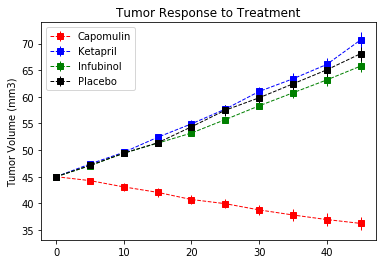

In [35]:
# Generate the Plot (with Error Bars)
plt.errorbar(
    frame.index,  # X
    frame["Capomulin"], # Y
    yerr=frameerrors["Capomulin"],     # Y-errors
    label="Capomulin",
    fmt="rs--", # format line like for plot()
    linewidth=1	# width of plot line
    )
plt.errorbar(
    frame.index,  # X
    frame["Ketapril"], # Y
    yerr=frameerrors["Ketapril"],     # Y-errors
    label="Ketapril",
    fmt="bs--", # format line like for plot()
    linewidth=1,	# width of plot line
    )
plt.errorbar(
    frame.index,  # X
    frame["Infubinol"], # Y
    yerr=frameerrors["Infubinol"],     # Y-errors
    label="Infubinol",
    fmt="gs--", # format line like for plot()
    linewidth=1	# width of plot line
    )
plt.errorbar(
    frame.index,  # X
    frame["Placebo"], # Y
    yerr=frameerrors["Placebo"],     # Y-errors
    label="Placebo",
    fmt="ks--", # format line like for plot()
    linewidth=1	# width of plot line
    )
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend() #Show legend
plt.show()
# Save the Figure
fig.savefig("Fig1.png")


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [36]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame
tumorvolume

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
...                                 ...               ...
Zoniferol 25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [37]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame
tumorvolumeerror

Metastatic Sites  Tumor Volume (mm3)
Drug      Timepoint                                      
Capomulin 0                  0.000000            0.000000
          5                  0.074833            0.448593
          10                 0.125433            0.702684
          15                 0.132048            0.838617
          20                 0.161621            0.909731
...                               ...                 ...
Zoniferol 25                 0.236621            0.602513
          30                 0.248168            0.800043
          35                 0.285714            0.881426
          40                 0.299791            0.998515
          45                 0.286400            1.003576

[100 rows x 2 columns]

In [38]:
# Minor Data Munging to Re-Format the Data Frames
tumorvolumereset = tumorvolume.reset_index(level=[0,1])
frame_sites = tumorvolumereset.pivot(index="Timepoint", columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
frame_sites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [39]:
frameerrorssites = tumorvolumeerrorreset.pivot(index="Timepoint", columns='Drug', values='Metastatic Sites')
frameerrorssites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


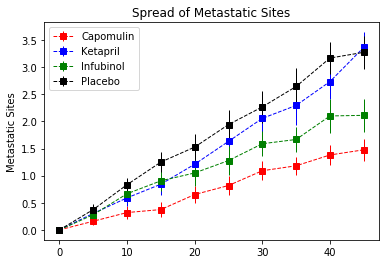

In [40]:
# Generate the Plot (with Error Bars)
plt.errorbar(
    frame_sites.index,  # X
    frame_sites["Capomulin"], # Y
    yerr=frameerrorssites["Capomulin"],     # Y-errors
    label="Capomulin",
    fmt="rs--", # format line like for plot()
    linewidth=1	# width of plot line
    )
plt.errorbar(
    frame_sites.index,  # X
    frame_sites["Ketapril"], # Y
    yerr=frameerrorssites["Ketapril"],     # Y-errors
    label="Ketapril",
    fmt="bs--", # format line like for plot()
    linewidth=1,	# width of plot line
    )
plt.errorbar(
    frame_sites.index,  # X
    frame_sites["Infubinol"], # Y
    yerr=frameerrorssites["Infubinol"],     # Y-errors
    label="Infubinol",
    fmt="gs--", # format line like for plot()
    linewidth=1	# width of plot line
    )
plt.errorbar(
    frame_sites.index,  # X
    frame_sites["Placebo"], # Y
    yerr=frameerrorssites["Placebo"],     # Y-errors
    label="Placebo",
    fmt="ks--", # format line like for plot()
    linewidth=1	# width of plot line
    )
plt.ylabel("Metastatic Sites")
plt.title("Spread of Metastatic Sites")
plt.legend() #Show legend

# Save the Figure
fig.savefig("Fig2.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount = data.groupby(["Drug", "Timepoint"]).count()

# Convert to DataFrame

# Preview DataFrame
micecount

Mouse ID  Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                                
Capomulin 0                25                  25                25
          5                25                  25                25
          10               25                  25                25
          15               24                  24                24
          20               23                  23                23
...                       ...                 ...               ...
Zoniferol 25               16                  16                16
          30               15                  15                15
          35               14                  14                14
          40               14                  14                14
          45               14                  14                14

[100 rows x 3 columns]

In [42]:
# Minor Data Munging to Re-Format the Data Frames
micecount = micecount.reset_index(level=[0,1])
micecount = micecount.pivot(index="Timepoint", columns='Drug', values='Mouse ID')
# Preview the Data Frame
micecount

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


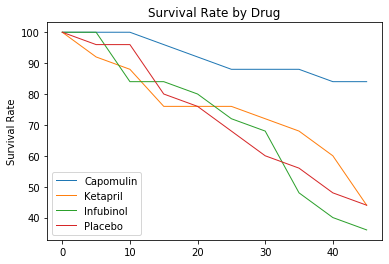

In [43]:
# Generate the Plot (Accounting for percentages)
plt.plot(
    micecount.index,  # X
    micecount["Capomulin"]*4, # Y (dividing by 25 (starting number of mice) and then multiplying by 100, simplified)
    label="Capomulin",
    linewidth=1	# width of plot line
    )
plt.plot(
    micecount.index,  # X
    micecount["Ketapril"]*4, # Y
    label="Ketapril",
    linewidth=1,	# width of plot line
    )
plt.plot(
    micecount.index,  # X
    micecount["Infubinol"]*4, # Y
    label="Infubinol",
    linewidth=1	# width of plot line
    )
plt.plot(
    micecount.index,  # X
    micecount["Placebo"]*4, # Y
    label="Placebo",
    linewidth=1	# width of plot line
    )
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Drug")
plt.legend() #Show legend

# Save the Figure
fig.savefig("Fig3.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [44]:
# Calculate the percent changes for each drug
percentchange = (frame.iloc[len(frame)-1] - frame.iloc[0]) /45 * 100
# Display the data to confirm
percentchange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

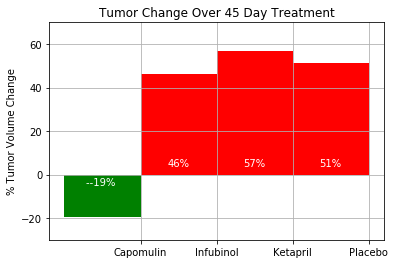

In [45]:
drugtuple = (percentchange["Capomulin"],percentchange["Infubinol"],percentchange["Ketapril"], 
                                                                  percentchange["Placebo"])                                                              

# Splice the data between passing and failing drugs
fig,ax = plt.subplots()
ind= np.arange(len(drugtuple))
width = 1
rpc_pass = ax.bar(ind[0],drugtuple[0],width, color ='g')
rpc_fail = ax.bar(ind[1:],drugtuple[1:],width, color='r')

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.set_xticks(ind+.5)
ax.set_xticklabels(("Capomulin","Infubinol","Ketapril","Placebo"))
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelPass(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -6,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
        

# Call functions to implement the function calls
autolabelPass(rpc_pass)
autolabelFail(rpc_fail)
#save and show figure
fig.savefig("Fig4.png")
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)